<a href="https://colab.research.google.com/github/AswathyS9778/project/blob/main/train_speech_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import models
from IPython import display


In [58]:
!pip3 install SpeechRecognition pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
import speech_recognition as sr

Import Data-Set

In [60]:
DATASET_PATH = 'data/voice8'

data_dir = pathlib.Path(DATASET_PATH)
if not data_dir.exists():
  tf.keras.utils.get_file(
      'voice8.zip',
      origin="/data/voice8.zip",
      extract=True,
      cache_dir='.', cache_subdir='data')

In [61]:
words = np.array(tf.io.gfile.listdir(str(data_dir)))
words = words[words != 'README.md']
print('words:', words)

words: ['banana' 'howareyou' 'hello' 'hobbies' 'areyoufine' 'apple' 'college']


In [62]:
filename = DATASET_PATH+'/hobbies/hobbies.wav'

In [63]:
r = sr.Recognizer()

In [64]:
with sr.AudioFile(filename) as source:
    audio_data = r.record(source)
    text = r.recognize_google(audio_data)
    print(text)

Hobee's


Extract audio clip

In [65]:
filenames = tf.io.gfile.glob(str(data_dir) + '/*/*')
filenames = tf.random.shuffle(filenames)
num_samples = len(filenames)
print('Number of total examples:', num_samples)
print('Number of examples per label:',
      len(tf.io.gfile.listdir(str(data_dir/words[0]))))
print('Example file tensor:', filenames[1])

Number of total examples: 346
Number of examples per label: 49
Example file tensor: tf.Tensor(b'data/voice8/college/college44.wav', shape=(), dtype=string)


In [66]:
train_files = filenames[:30]
val_files = filenames[30: 30 + 25]
test_files = filenames[-25:]

print('Training set size', len(train_files))
print('Validation set size', len(val_files))
print('Test set size', len(test_files))

Training set size 30
Validation set size 25
Test set size 25


In [67]:
test_file = tf.io.read_file(DATASET_PATH+'/college/college.wav')
test_audio, _ = tf.audio.decode_wav(contents=test_file)
test_audio.shape

TensorShape([94936, 1])

Preprocess the audio file

In [68]:
def decode_audio(audio_binary):
  audio, _ = tf.audio.decode_wav(contents=audio_binary)
  return tf.squeeze(audio, axis=-1)

In [69]:
def get_label(file_path):
  parts = tf.strings.split(
      input=file_path,
      sep=os.path.sep)
  
  return parts[-2]

In [70]:
def get_waveform_and_label(file_path):
  label = get_label(file_path)
  audio_binary = tf.io.read_file(file_path)
  waveform = decode_audio(audio_binary)
  return waveform, label

Build the training set to extract the audio file:

In [71]:
AUTOTUNE = tf.data.AUTOTUNE

files_ds = tf.data.Dataset.from_tensor_slices(train_files)

waveform_ds = files_ds.map(
    map_func=get_waveform_and_label,
    num_parallel_calls=AUTOTUNE)

Plot waveforms:

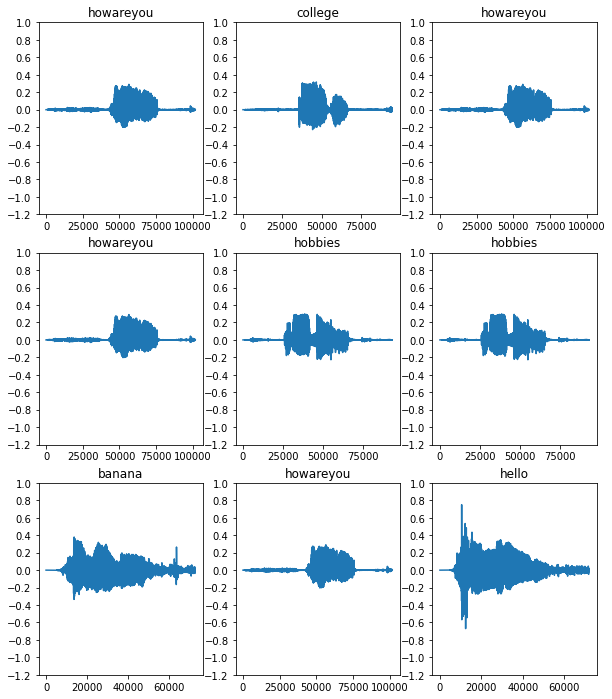

In [72]:
rows = 3
cols = 3
n = rows * cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 12))

for i, (audio, label) in enumerate(waveform_ds.take(n)):
  r = i // cols
  c = i % cols
  ax = axes[r][c]
  ax.plot(audio.numpy())
  ax.set_yticks(np.arange(-1.2, 1.2, 0.2))
  label = label.numpy().decode('utf-8')
  ax.set_title(label)

plt.show()

Convert waveforms to spectrograms:

In [73]:
def get_spectrogram(waveform):
  
  input_len = 16000
  waveform = waveform[:input_len]
  zero_padding = tf.zeros(
      [16000] - tf.shape(waveform),
      dtype=tf.float32)
  waveform = tf.cast(waveform, dtype=tf.float32)
  equal_length = tf.concat([waveform, zero_padding], 0)
  spectrogram = tf.signal.stft(
      equal_length, frame_length=255, frame_step=128)
  spectrogram = tf.abs(spectrogram)
  spectrogram = spectrogram[..., tf.newaxis]
  return spectrogram

exploring the data:

In [74]:
for waveform, label in waveform_ds.take(1):
  label = label.numpy().decode('utf-8')
  print('Label:', label)

Label: howareyou


In [75]:
print('Audio playback')
display.display(display.Audio(waveform, rate=42000))

Audio playback


In [76]:
for waveform, label in waveform_ds.take(2):
  label = label.numpy().decode('utf-8')
  spectrogram = get_spectrogram(waveform)

print('Label:', label)

Label: college


In [77]:
print('Audio playback')
display.display(display.Audio(waveform, rate=42000))

Audio playback


In [78]:
for waveform, label in waveform_ds.take(3):
  label = label.numpy().decode('utf-8')
  spectrogram = get_spectrogram(waveform)

print('Label:', label)

Label: howareyou


In [79]:
print('Audio playback')
display.display(display.Audio(waveform, rate=42000))

Audio playback


In [80]:
for waveform, label in waveform_ds.take(4):
  label = label.numpy().decode('utf-8')
  spectrogram = get_spectrogram(waveform)

print('Label:', label)

Label: howareyou


In [81]:
print('Audio playback')
display.display(display.Audio(waveform, rate=42000))

Audio playback


In [82]:
for waveform, label in waveform_ds.take(5):
  label = label.numpy().decode('utf-8')
  spectrogram = get_spectrogram(waveform)

print('Label:', label)

Label: hobbies


In [83]:
print('Audio playback')
display.display(display.Audio(waveform, rate=42000))

Audio playback


In [84]:
for waveform, label in waveform_ds.take(6):
  label = label.numpy().decode('utf-8')
  spectrogram = get_spectrogram(waveform)

print('Label:', label)

Label: hobbies


In [85]:
print('Audio playback')
display.display(display.Audio(waveform, rate=42000))

Audio playback


In [86]:
for waveform, label in waveform_ds.take(7):
  label = label.numpy().decode('utf-8')
  spectrogram = get_spectrogram(waveform)

print('Label:', label)

Label: banana


In [87]:
print('Audio playback')
display.display(display.Audio(waveform, rate=42000))

Audio playback


In [88]:
for waveform, label in waveform_ds.take(19):
  label = label.numpy().decode('utf-8')
  spectrogram = get_spectrogram(waveform)

print('Label:', label)

Label: howareyou


In [89]:
print('Audio playback')
display.display(display.Audio(waveform, rate=42000))

Audio playback


In [90]:
def plot_spectrogram(spectrogram, ax):
  if len(spectrogram.shape) > 2:
    assert len(spectrogram.shape) == 3
    spectrogram = np.squeeze(spectrogram, axis=-1)
  log_spec = np.log(spectrogram.T + np.finfo(float).eps)
  height = log_spec.shape[0]
  width = log_spec.shape[1]
  X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
  Y = range(height)
  ax.pcolormesh(X, Y, log_spec)

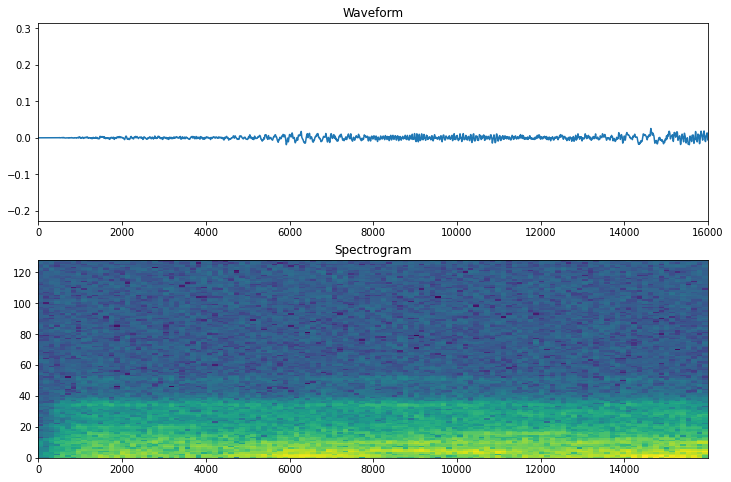

In [91]:
fig, axes = plt.subplots(2, figsize=(12, 8))
timescale = np.arange(waveform.shape[0])
axes[0].plot(timescale, waveform.numpy())
axes[0].set_title('Waveform')
axes[0].set_xlim([0, 16000])

plot_spectrogram(spectrogram.numpy(), axes[1])
axes[1].set_title('Spectrogram')
plt.show()

In [92]:
def get_spectrogram_and_label_id(audio, label):
  spectrogram = get_spectrogram(audio)
  label_id = tf.math.argmax(label == words)
  return spectrogram, label_id

In [93]:
spectrogram_ds = waveform_ds.map(
  map_func=get_spectrogram_and_label_id,
  num_parallel_calls=AUTOTUNE)

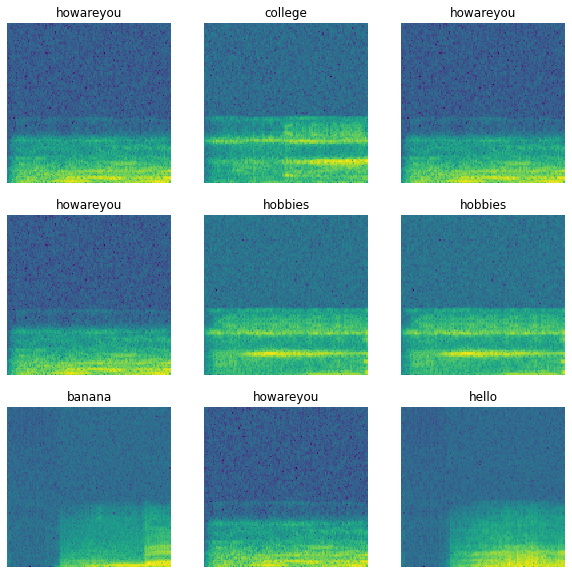

In [94]:
rows = 3
cols = 3
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

for i, (spectrogram, label_id) in enumerate(spectrogram_ds.take(n)):
  r = i // cols
  c = i % cols
  ax = axes[r][c]
  plot_spectrogram(spectrogram.numpy(), ax)
  ax.set_title(words[label_id.numpy()])
  ax.axis('off')

plt.show()

Build and train the model:

In [95]:
def preprocess_dataset(files):
  files_ds = tf.data.Dataset.from_tensor_slices(files)
  output_ds = files_ds.map(
      map_func=get_waveform_and_label,
      num_parallel_calls=AUTOTUNE)
  output_ds = output_ds.map(
      map_func=get_spectrogram_and_label_id,
      num_parallel_calls=AUTOTUNE)
  return output_ds

In [96]:
train_ds = spectrogram_ds
val_ds = preprocess_dataset(val_files)
test_ds = preprocess_dataset(test_files)

In [97]:
batch_size = 64
train_ds = train_ds.batch(batch_size)
val_ds = val_ds.batch(batch_size)

In [98]:
train_ds = train_ds.cache().prefetch(AUTOTUNE)
val_ds = val_ds.cache().prefetch(AUTOTUNE)

In [99]:
for spectrogram, _ in spectrogram_ds.take(1):
  input_shape = spectrogram.shape
print('Input shape:', input_shape)
num_labels = len(words)

norm_layer = layers.Normalization()

norm_layer.adapt(data=spectrogram_ds.map(map_func=lambda spec, label: spec))

model = models.Sequential([
    layers.Input(shape=input_shape),
    layers.Resizing(32, 32),
    norm_layer,
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_labels),
])

model.summary()

Input shape: (124, 129, 1)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_1 (Resizing)       (None, 32, 32, 1)         0         
                                                                 
 normalization_1 (Normalizat  (None, 32, 32, 1)        3         
 ion)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)       

In [100]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

Train the model over 10 epochs :

In [106]:
EPOCHS = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=2),
)

Epoch 1/10
1/1 [==============================] - 0s 234ms/step - loss: 0.4940 - accuracy: 0.8333 - val_loss: 0.5306 - val_accuracy: 0.7600
Epoch 2/10
1/1 [==============================] - 0s 240ms/step - loss: 0.4567 - accuracy: 0.8667 - val_loss: 0.4272 - val_accuracy: 0.7600
Epoch 3/10
1/1 [==============================] - 0s 221ms/step - loss: 0.5974 - accuracy: 0.8000 - val_loss: 0.3571 - val_accuracy: 0.7600
Epoch 4/10
1/1 [==============================] - 0s 230ms/step - loss: 0.2297 - accuracy: 0.9667 - val_loss: 0.3109 - val_accuracy: 0.7600
Epoch 5/10
1/1 [==============================] - 0s 222ms/step - loss: 0.4071 - accuracy: 0.8667 - val_loss: 0.2765 - val_accuracy: 0.7600
Epoch 6/10
1/1 [==============================] - 0s 232ms/step - loss: 0.2740 - accuracy: 0.9333 - val_loss: 0.2521 - val_accuracy: 0.7600
Epoch 7/10
1/1 [==============================] - 0s 227ms/step - loss: 0.2659 - accuracy: 0.9333 - val_loss: 0.2150 - val_accuracy: 1.0000
Epoch 8/10
1/1 [====

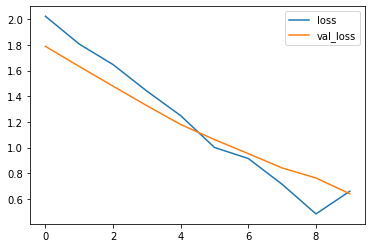

In [102]:
metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

Evaluate the model performance:

In [103]:
test_audio = []
test_labels = []

for audio, label in test_ds:
  test_audio.append(audio.numpy())
  test_labels.append(label.numpy())

test_audio = np.array(test_audio)
test_labels = np.array(test_labels)

In [ ]:
y_pred = np.argmax(model.predict(test_audio), axis=1)
y_true = test_labels

test_acc = sum(y_pred == y_true) / len(y_true)
print(f'Test set accuracy: {test_acc:.0%}')

Display a confusion matrix:

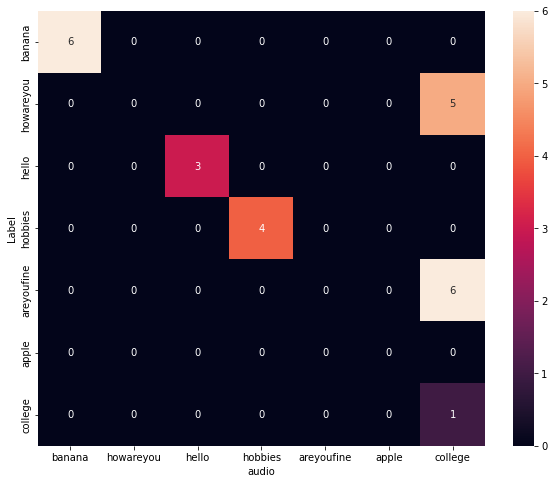

In [104]:
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=words,
            yticklabels=words,
            annot=True, fmt='g')
plt.xlabel('audio')
plt.ylabel('Label')
plt.show()

In [105]:
import pickle
with open('speech.pkl','wb') as f:  
  pickle.dump(model,f)